# Question 1 : Linear Regression with L2 regularization

### A : Perform pre-processing and EDA on the data and split it into training and testing datasets. Have a split ratio of 70% and 30% for the training and testing datasets. Please provide an explanation of the performance. Students can make visualizations if necessary. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# loadind the dataset
df = pd.read_csv('Real estate.csv')
df1 = df
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
# Displayng the size and shape of the data
print(df.shape)
df.info()

(414, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
# checking for missing values in dataset
print(df.isna().sum())

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


In [5]:
# Printing statistics
print(df.describe())

               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  

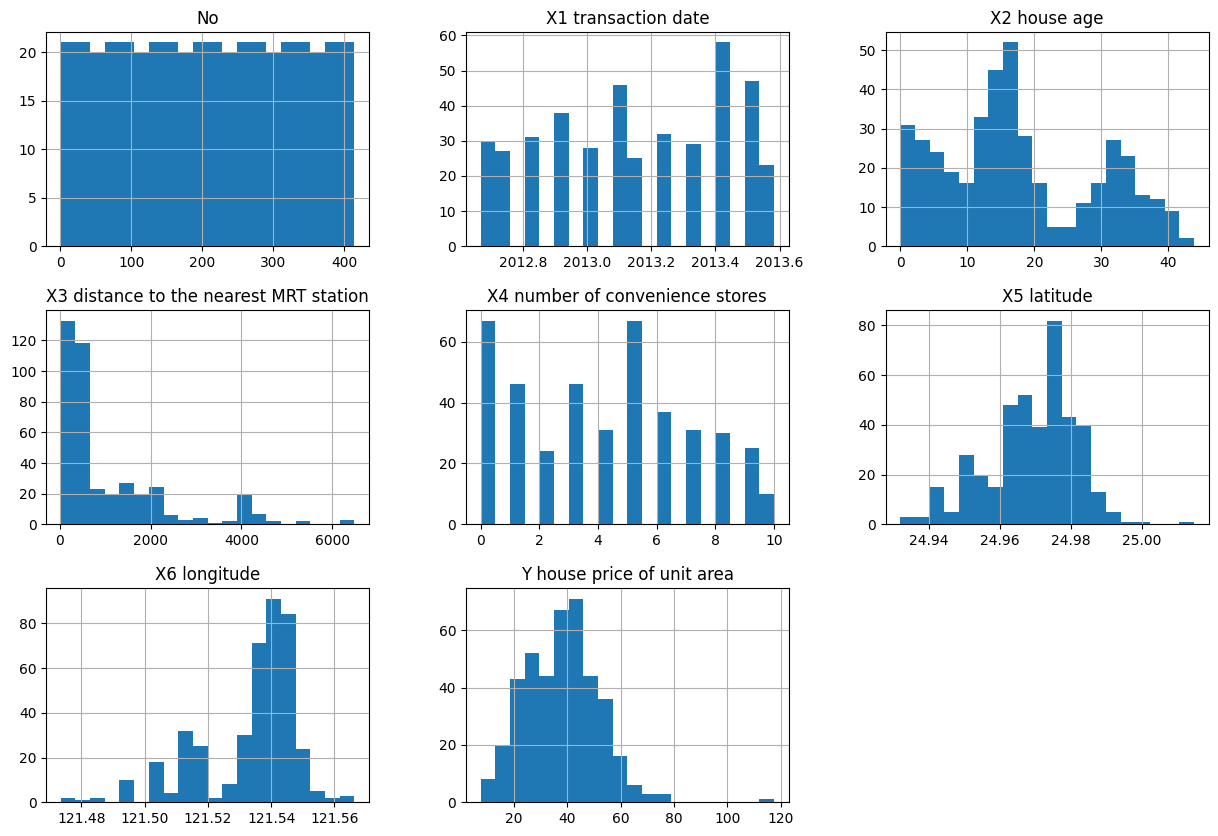

In [6]:
# visualize features and target variable
df.hist(bins=20, figsize=(15, 10))
plt.show()

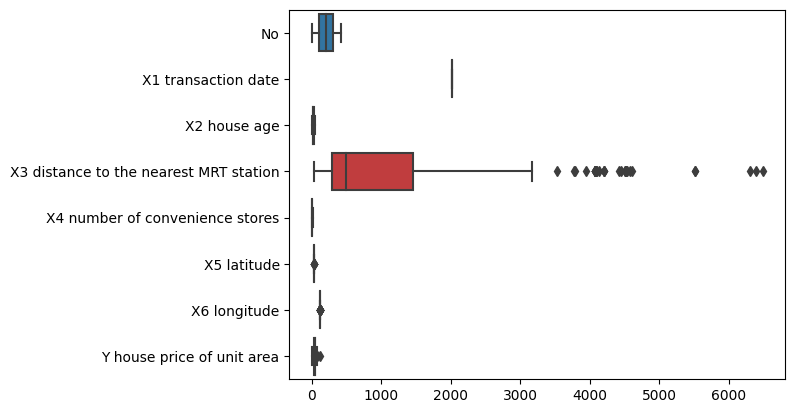

In [7]:
#Plotting the Box-plot graph
sns.boxplot(data=df, orient='h')
plt.show()

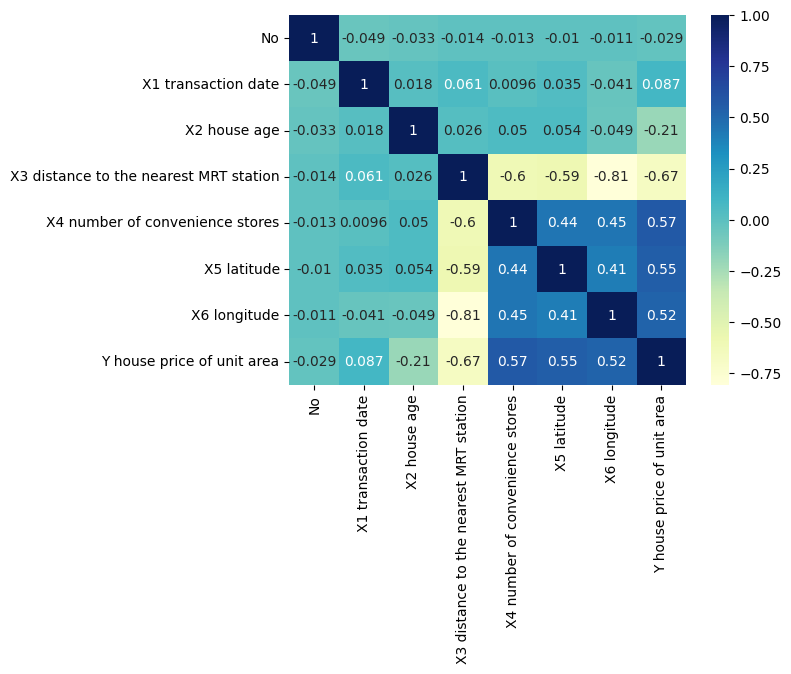

In [8]:
# Displaying correlation matrix and heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()


### B : Define a function model that takes the parameters features, labels, learning rate, lambda (regularization coefficient), epochs, and batch size. This model will perform mini-batch gradient descent. You can initialize random weights using NumPy. Report the mean squared error (MSE) at the end of every epoch. This model is going to return the learned weights. Make a visualization of MSE vs. epoch. 

Epoch 1, MSE: 86.33
Epoch 2, MSE: 81.01
Epoch 3, MSE: 79.64
Epoch 4, MSE: 80.16
Epoch 5, MSE: 79.84
Epoch 6, MSE: 79.33
Epoch 7, MSE: 79.54
Epoch 8, MSE: 79.94
Epoch 9, MSE: 79.47
Epoch 10, MSE: 82.17
Epoch 11, MSE: 79.99
Epoch 12, MSE: 83.21
Epoch 13, MSE: 80.39
Epoch 14, MSE: 79.99
Epoch 15, MSE: 82.28
Epoch 16, MSE: 80.63
Epoch 17, MSE: 78.93
Epoch 18, MSE: 80.07
Epoch 19, MSE: 80.04
Epoch 20, MSE: 79.27
Epoch 21, MSE: 83.76
Epoch 22, MSE: 80.09
Epoch 23, MSE: 80.01
Epoch 24, MSE: 79.34
Epoch 25, MSE: 82.17
Epoch 26, MSE: 80.19
Epoch 27, MSE: 79.53
Epoch 28, MSE: 79.31
Epoch 29, MSE: 81.24
Epoch 30, MSE: 80.34
Epoch 31, MSE: 80.63
Epoch 32, MSE: 79.53
Epoch 33, MSE: 81.18
Epoch 34, MSE: 80.28
Epoch 35, MSE: 80.51
Epoch 36, MSE: 79.41
Epoch 37, MSE: 78.98
Epoch 38, MSE: 80.03
Epoch 39, MSE: 80.17
Epoch 40, MSE: 80.53
Epoch 41, MSE: 79.27
Epoch 42, MSE: 81.02
Epoch 43, MSE: 81.50
Epoch 44, MSE: 80.49
Epoch 45, MSE: 80.81
Epoch 46, MSE: 79.73
Epoch 47, MSE: 80.46
Epoch 48, MSE: 79.80
E

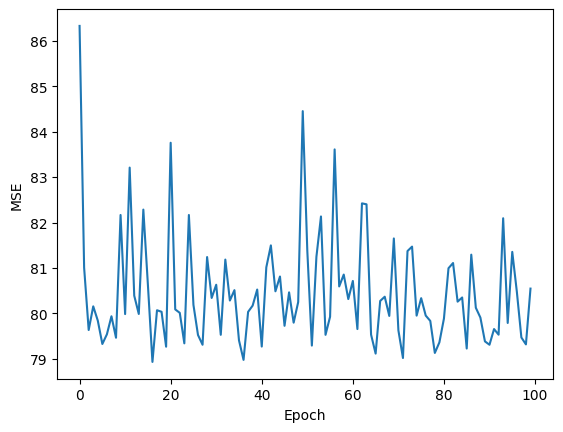

In [9]:
from sklearn.preprocessing import StandardScaler
data = df1

# defining features and labels
features = data.drop('Y house price of unit area', axis=1).values
labels = data['Y house price of unit area'].values

# creating function for preprocessing
def preprocess(X):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return np.insert(X, 0, 1, axis=1)

# Defining ridge regression model with L2 regularization
def mini_batch_gradient_descent(features, labels, learning_rate, lmbda, epochs, batch_size):
    n = features.shape[1]
    weights = np.random.randn(n)
    m = features.shape[0]
    mse_values = []
    for i in range(epochs):
        # shuffle data using random function
        shuffle_indices = np.random.permutation(m)
        features_shuffled = features[shuffle_indices]
        labels_shuffled = labels[shuffle_indices]
        
        # spliting dataset into mini-batches
        for j in range(0, m, batch_size):
            end_idx = j + batch_size if j + batch_size <= m else m
            batch_features = features_shuffled[j:end_idx]
            batch_labels = labels_shuffled[j:end_idx]
            
            # compute gradients and updating weights
            preds = np.dot(batch_features, weights)
            errors = preds - batch_labels
            gradient = np.dot(batch_features.T, errors) + lmbda * weights
            weights = weights - learning_rate * gradient
            
        # compute MSE and append to list
        train_preds = np.dot(features, weights)
        mse = np.mean((train_preds - labels)**2)
        mse_values.append(mse)
        print(f"Epoch {i+1}, MSE: {mse:.2f}")
        
    # plot MSE vs epoch
    plt.plot(range(epochs), mse_values)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.show()
    return weights

# spliting dataset into training and test sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=42)

# perform pre-processing function of trainging ang testing data
train_features = preprocess(train_features)
test_features = preprocess(test_features)

# training model using mini-batch gradient descent
learning_rate = 0.01
lmbda = 0.1
epochs = 100
batch_size = 16
weights = mini_batch_gradient_descent(train_features, train_labels, learning_rate, lmbda, epochs, batch_size)



### C : Use the weights obtained from the model and predict the output of the test set.

In [10]:
# using learned weights to predict output
test_pred = np.dot(test_features, weights)

### D : Calculate the mean squared error of the prediction.

In [11]:
# calculating MSE of prediction
mse = np.mean((test_pred - test_labels)**2)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 84.41


# Question 2: Scikit-learn Ridge regression.
# In this question, students will use the Scikit-learn Ridge regression model to # predict the real estate cost and compare the results found in Question 1. 


### A : Now import linear regression from Scikit-learn and train the model.

In [12]:
from sklearn.linear_model import Ridge
# spliting dataset
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=42)

# perform pre-processing function of trainging ang testing data
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# train the Ridge regression model using Scikit-learn
ridge_reg = Ridge(alpha=0.1) # set regularization parameter
ridge_reg.fit(train_features, train_labels)

# get the learned weights and intercept
learned_weights_sklearn = ridge_reg.coef_
learned_intercept_sklearn = ridge_reg.intercept_

### B : Get the prediction on the test set.

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
# predicting the model trained using NumPy
test_predictions_numpy = np.dot(test_features, learned_weights_sklearn) + learned_intercept_sklearn
test_mse_numpy = np.mean((test_predictions_numpy - test_labels)**2)

# predict the model trained using scikit-learn model
test_predictions_sklearn = ridge_reg.predict(test_features)
test_mse_sklearn = mean_squared_error(test_labels, test_predictions_sklearn)

### C : Compare the result of your model to that of the Scikit-learn model.

In [14]:
# comparing the MSE of both models
print("MSE of NumPy model:", test_mse_numpy)
print("MSE of Scikit-learn model:", test_mse_sklearn)

MSE of NumPy model: 74.69387396963236
MSE of Scikit-learn model: 74.69387396963236
